In [64]:
#Import some common libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Checking AUC = P(X1>X0) relation for a random synthetic dataset

In [ ]:
"""
P(X1>X0) = the probability that a randomly chosen positive instance will be ranked higher (higher probability score) 
than a randomly chosen negative instance by the classifier, based on the expected performance of the classifier 
across all possible classification thresholds.
"""

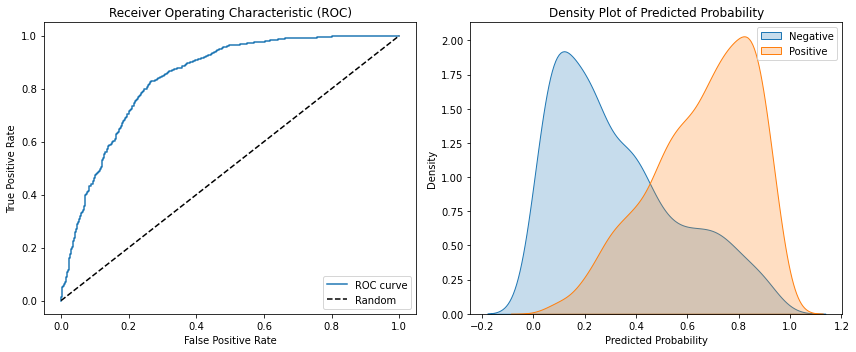

AUC: 0.8417444042916771
Probability of a positive instance being ranked higher: 0.841


In [54]:
# Generate sample data
np.random.seed(29)

# Generate a dataset with 10000 samples, 2 features, and no imbalance
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.5, weights=[0.5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a classification model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate the AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve and density plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC curve
ax[0].plot(fpr, tpr, label='ROC curve')
ax[0].plot([0, 1], [0, 1], 'k--', label='Random')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operating Characteristic (ROC)')
ax[0].legend(loc='lower right')

# Plot density plot
sns.kdeplot(y_pred_proba[y_test == 0], shade=True, label='Negative', ax=ax[1])
sns.kdeplot(y_pred_proba[y_test == 1], shade=True, label='Positive', ax=ax[1])
ax[1].set_xlabel('Predicted Probability')
ax[1].set_ylabel('Density')
ax[1].set_title('Density Plot of Predicted Probability')
ax[1].legend()

plt.tight_layout()
plt.show()

# Experiment to establish the probabilistic interpretation

num_samples = 1000  # Number of random samples to consider
positive_higher_count = 0  # Counter for positive instances ranked higher

for _ in range(num_samples):
    # Randomly choose a positive instance and a negative instance
    positive_index = np.random.choice(np.where(y_test == 1)[0])
    negative_index = np.random.choice(np.where(y_test == 0)[0])

    # Get the predicted probabilities for both instances
    positive_prob = y_pred_proba[positive_index]
    negative_prob = y_pred_proba[negative_index]

    # Compare the probabilities
    if positive_prob > negative_prob:
        positive_higher_count += 1

# Calculate the probability of a positive instance being ranked higher than a negative instance
probability_positive_higher = positive_higher_count / num_samples
print("Probability of a positive instance being ranked higher:", probability_positive_higher)

In [8]:
# # Step 8: Calculate the Gini coefficient
# sorted_indices = np.argsort(y_pred_proba)[::-1]  # Sort the predicted probabilities in decreasing order
# sorted_labels = y_pred_proba[sorted_indices]  # Sort the true labels based on the sorted indices

# cumulative_positive = np.cumsum(sorted_labels)  # Calculate the cumulative sum of positive labels
# cumulative_positive_ratio = cumulative_positive / np.sum(sorted_labels)  # Calculate the cumulative positive ratio
# cumulative_negative_ratio = np.cumsum(1 - sorted_labels) / np.sum(1 - sorted_labels)  # Calculate the cumulative negative ratio

# gini_coefficient = np.sum(cumulative_positive_ratio[:-1] * cumulative_negative_ratio[1:] - cumulative_positive_ratio[1:] * cumulative_negative_ratio[:-1])
# print(f'Gini coefficient= {gini_coefficient}')
# print(f'2*AUC-1={2*auc-1}' )

Gini coefficient= 0.636829564726706
2*AUC-1=0.6834888085833541


# Checking AUC = P(X1>X0) relation for 10 different random datasets

In [41]:
import imageio

# Define the number of iterations
num_iterations = 10

# Initialize a list to store the images
images = []

for _ in range(num_iterations):
    # Generate a dataset with 10000 samples, 2 features, and no imbalance
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.5)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a classification model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_proba)

   # Plot the ROC curve and density plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot ROC curve
    ax[0].plot(fpr, tpr, label='ROC curve')
    ax[0].plot([0, 1], [0, 1], 'k--', label='Random')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'Receiver Operating Characteristic (ROC) w/ AUC={auc:.2f}')
    ax[0].legend(loc='lower right')

    # Plot density plot
    sns.kdeplot(y_pred_proba[y_test == 0], shade=True, label='Negative', ax=ax[1])
    sns.kdeplot(y_pred_proba[y_test == 1], shade=True, label='Positive', ax=ax[1])
    ax[1].set_xlabel('Predicted Probability')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Density Plot of Predicted Probability')
    ax[1].legend()
    plt.tight_layout()
   
    # Save the ROC plot
    plt.savefig('roc & density plot.png')
    images.append(imageio.imread('roc & density plot.png'))
    plt.close()


    # Additional demonstration: Calculation of probability
    num_samples = 1000  # Number of random samples to consider
    positive_higher_count = 0  # Counter for positive instances ranked higher

    for _ in range(num_samples):
        # Randomly choose a positive instance and a negative instance
        positive_index = np.random.choice(np.where(y_test == 1)[0])
        negative_index = np.random.choice(np.where(y_test == 0)[0])

        # Get the predicted probabilities for both instances
        positive_prob = y_pred_proba[positive_index]
        negative_prob = y_pred_proba[negative_index]

        # Compare the probabilities
        if positive_prob > negative_prob:
            positive_higher_count += 1

    # Calculate the probability of a positive instance being ranked higher than a negative instance
    probability_positive_higher = positive_higher_count / num_samples                           

    # Save the AUC and probability output to an image   
    text_output = f"AUC: {auc}\nProbability of positive instance being ranked higher: {probability_positive_higher}"
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.text(0.5, 0.5, text_output, ha='center', va='center', fontsize=18)
    ax.axis('off')
    plt.savefig('output.png')
    images.append(imageio.imread('output.png'))
    plt.close()
    
# Save the images as a GIF
imageio.mimsave('output.gif', images, duration=2)

print("GIF created successfully!")

GIF created successfully!


# Checking AUC = P(X1>X0) relation for different class imbalance ratios

In [40]:
# Define different class imbalances
w = [0.5,0.6,0.7,0.8, 0.9,0.99]

# Initialize a list to store the images
images = []

for wt in w:
    # Generate sample data
    np.random.seed(29)
    # Generate a balanced dataset with 10000 samples and 2 features
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.5, weights=[wt])
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a classification model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot the ROC curve and density plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

   # Plot ROC curve
    ax[0].plot(fpr, tpr, label='ROC curve')
    ax[0].plot([0, 1], [0, 1], 'k--', label='Random')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'Receiver Operating Characteristic (ROC) for {(1-wt)*100:.2f}% Imbalance\nAUC={auc:.2f}')
    ax[0].legend(loc='lower right')

    # Plot density plot
    sns.kdeplot(y_pred_proba[y_test == 0], shade=True, label='Negative', ax=ax[1])
    sns.kdeplot(y_pred_proba[y_test == 1], shade=True, label='Positive', ax=ax[1])
    ax[1].set_xlabel('Predicted Probability')
    ax[1].set_ylabel('Density')
    ax[1].set_title(f'Density Plot of Predicted Probability for {(1-wt)*100:.2f}% Imbalance')
    ax[1].legend()
    plt.tight_layout()
   
    # Save the ROC plot
    plt.savefig('roc & density plots.png')
    images.append(imageio.imread('roc & density plots.png'))
    plt.close()


    # Additional demonstration: Calculation of probability
    num_samples = 1000  # Number of random samples to consider
    positive_higher_count = 0  # Counter for positive instances ranked higher

    for _ in range(num_samples):
        # Randomly choose a positive instance and a negative instance
        positive_index = np.random.choice(np.where(y_test == 1)[0])
        negative_index = np.random.choice(np.where(y_test == 0)[0])

        # Get the predicted probabilities for both instances
        positive_prob = y_pred_proba[positive_index]
        negative_prob = y_pred_proba[negative_index]

        # Compare the probabilities
        if positive_prob > negative_prob:
            positive_higher_count += 1

    # Calculate the probability of a positive instance being ranked higher than a negative instance
    probability_positive_higher = positive_higher_count / num_samples
                           
    # Save the AUC and probability output to an image   
    text_output = f"AUC: {auc}\nProbability of positive instance being ranked higher: {probability_positive_higher}"
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.text(0.5, 0.5, text_output, ha='center', va='center', fontsize=18)
    ax.axis('off')
    plt.savefig('output.png')
    images.append(imageio.imread('output.png'))
    plt.close()
    
# Save the images as a GIF
imageio.mimsave('output.gif', images, duration=2)

print("GIF created successfully!")

GIF created successfully!


# Checking AUC & Mann-Whitney U test statistic equivalence i.e., AUC= U/(n1*n2)

In [65]:
from scipy.stats import mannwhitneyu

#Source the actual & predicted labels
y_true = y_test # actual labels
y_score = y_pred_proba  # predicted scores

# Perform the Mann-Whitney U test
MW_U_statistic, pvalue = mannwhitneyu(y_score[y_true == 1], y_score[y_true == 0])

# Validation of AUC = U/n1*n2

n1=len(y_true[y_true == 1])
n2=len(y_true[y_true == 0])

print(f'AUC= {auc}')
print(f'U/(n1*n2)= {MW_U_statistic/(n1*n2)}\n')

# Output the results
print("Mann-Whitney U test statistic:", MW_U_statistic)
print("Mann-Whitney U test p-value:", pvalue,'\n')

AUC= 0.9300678810860974
U/(n1*n2)= 0.9300678810860974

Mann-Whitney U test statistic: 930053.0
Mann-Whitney U test p-value: 3.3471715148251115e-243 



# Checking AUC & Mann-Whitney U test statistic equivalence i.e., AUC= U/(n1*n2) for different class imbalances

In [44]:
# Define the class imbalances

w = [0.5,0.6,0.7,0.8, 0.9,0.99]

# Initialize a list to store the images
images = []

for wt in w:
    # Generate sample data
    np.random.seed(29)
    # Generate a dataset with 10000 samples, 2 features, and no imbalance
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.5, weights=[wt])
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a classification model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot the ROC curve and density plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

   # Plot ROC curve
    ax[0].plot(fpr, tpr, label='ROC curve')
    ax[0].plot([0, 1], [0, 1], 'k--', label='Random')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'Receiver Operating Characteristic (ROC) for {(1-wt)*100:.2f}% Imbalance\nAUC={auc:.2f}')
    ax[0].legend(loc='lower right')

    # Plot density plot
    sns.kdeplot(y_pred_proba[y_test == 0], shade=True, label='Negative', ax=ax[1])
    sns.kdeplot(y_pred_proba[y_test == 1], shade=True, label='Positive', ax=ax[1])
    ax[1].set_xlabel('Predicted Probability')
    ax[1].set_ylabel('Density')
    ax[1].set_title(f'Density Plot of Predicted Probability for {(1-wt)*100:.2f}% Imbalance')
    ax[1].legend()
    plt.tight_layout()
   
    # Save the ROC plot
    plt.savefig('roc& density plots.png')
    images.append(imageio.imread('roc& density plots.png'))
    plt.close()

    # Establishing AUROC's statistical interpretation
    
    #Source the actual & predicted labels
    y_true = y_test # actual labels
    y_score = y_pred_proba  # predicted scores

    # Perform the Mann-Whitney U test
    MW_U_statistic, pvalue = mannwhitneyu(y_score[y_true == 1], y_score[y_true == 0])

    # Validation of AUC = U/n1*n2

    n1=len(y_true[y_true == 1])
    n2=len(y_true[y_true == 0])

    # Save the AUC and probability output to an image   
    text_output = f"AUC= {auc}\nU/(n1*n2)= {MW_U_statistic/(n1*n2)}\n\nMann-Whitney U test statistic:{MW_U_statistic}\nMann-Whitney U test p-value:{pvalue}"
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.text(0.5, 0.5, text_output, ha='center', va='center', fontsize=18)
    ax.axis('off')
    plt.savefig('output.png')
    images.append(imageio.imread('output.png'))
    plt.close()
    
# Save the images as a GIF
imageio.mimsave('output.gif', images, duration=2)

print("GIF created successfully!")

GIF created successfully!


# Checking AUC &  Gini Coefficient relation i.e., 2*AUC-1 = Gini

In [57]:
import warnings
warnings.filterwarnings('ignore')

"""Source for the gini functions:
https://www.kaggle.com/code/batzner/gini-coefficient-an-intuitive-explanation/notebook"""

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

print(f'Gini coefficient= {gini_normalized(y_test,y_pred_proba)}')
print(f'2*AUC-1={2*auc-1}' )

Gini coefficient= 0.6834888085833541
2*AUC-1=0.6834888085833541


In [ ]:
pip install scikit-plot

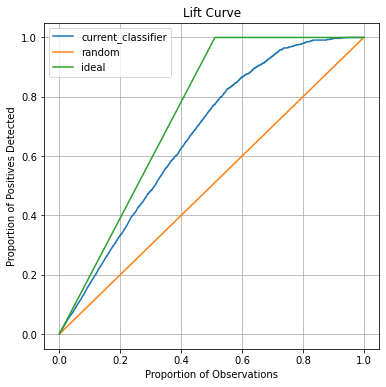

In [61]:
#Plot the Lift Curve

from scikitplot.helpers import cumulative_gain_curve #Same as Lift Curve

import pandas as pd

per, gain = cumulative_gain_curve(y_test,y_pred_proba)

lc = pd.DataFrame({'per':per,'current_classifier':gain})
lc['random'] = lc['per']
_, ideal = cumulative_gain_curve(y_test,y_test)
lc['ideal'] = ideal
# Plotting
ax = lc.plot(x='per', y=['current_classifier', 'random', 'ideal'], grid=True, figsize=(6, 6))
ax.set_title('Lift Curve')
ax.set_xlabel('Proportion of Observations')
ax.set_ylabel('Proportion of Positives Detected')
plt.show()

# Checking the relation 2*AUC-1 = Gini for 10 different random datasets

In [63]:
# Define the number of iterations
num_iterations = 10

# Initialize a list to store the images
images = []

for _ in range(num_iterations):
    # Generate a dataset with 10000 samples, 2 features, and no imbalance
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.5)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a classification model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
   
    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    
     # Plot the ROC curve and density plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

   # Plot ROC curve
    ax[0].plot(fpr, tpr, label='ROC curve')
    ax[0].plot([0, 1], [0, 1], 'k--', label='Random')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'Receiver Operating Characteristic (ROC) w/ AUC={auc:.2f}')
    ax[0].legend(loc='lower right')

    # Plot Lift Curve
    per, gain = cumulative_gain_curve(y_test,y_pred_proba)
    lc = pd.DataFrame({'per':per,'current_classifier':gain})
    lc['random'] = lc['per']
    _, ideal = cumulative_gain_curve(y_test,y_test)
    lc['ideal'] = ideal
    # Plotting
    lc.plot(x='per', y=['current_classifier', 'random', 'ideal'], grid=True, ax=ax[1])
    ax[1].set_title('Lift Curve')
    ax[1].set_xlabel('Proportion of Observations')
    ax[1].set_ylabel('Proportion of Positives Detected')
    plt.tight_layout()

    # Save the ROC plot
    plt.savefig('roc& density plots.png')
    images.append(imageio.imread('roc& density plots.png'))
    plt.close()

    
 # Save the AUC and probability output to an image
    text_output = f"Gini_coefficient: {gini_normalized(y_test,y_pred_proba)}\n2*AUC-1: {2*auc-1}"
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.text(0.5, 0.5, text_output, ha='center', va='center', fontsize=15)
    ax.axis('off')
    plt.savefig('output.png')
    images.append(imageio.imread('output.png'))
    plt.close()
    

# Save the images as a GIF
imageio.mimsave('output.gif', images, duration=2)

print("GIF created successfully!")

GIF created successfully!
